### Importing Libraries

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.tree import DecisionTreeRegressor

from pylab import rcParams
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, SGDRegressor, HuberRegressor, TheilSenRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFECV
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from lime import lime_tabular
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from collections import Counter
from numpy import mean
from IPython.core.interactiveshell import InteractiveShell 
import xgboost as xgb
from sklearn.model_selection import train_test_split
import warnings
import matplotlib  
import statsmodels.formula.api as smf    
import statsmodels.api as sm  
from sklearn.preprocessing import robust_scale
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer    
from lime import lime_tabular
from mlxtend.preprocessing import minmax_scaling
from scipy import stats
!pip install sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

ERROR: Could not find a version that satisfies the requirement sklearn.preprocessing (from versions: none)
ERROR: No matching distribution found for sklearn.preprocessing


### LOADING THE DATASET

In [16]:
df = pd.read_csv('steel pricing data 2.csv')
df.head(10)

Month_Year  Iron Ore Lumps Base Price (INR/dry metric tonne)  \
0     Sep-18                                             49.48   
1     Oct-18                                             54.04   
2     Nov-18                                             52.62   
3     Dec-18                                             48.99   
4     Jan-19                                             53.88   
5     Feb-19                                             62.82   
6     Mar-19                                             60.08   
7     Apr-19                                             65.05   
8     May-19                                             69.89   
9     Jun-19                                             75.65   

   Nickel Price (INR/Metric Ton)  Zinc Price (INR/Metric Ton)  \
0                       904502.4                     176028.2   
1                       906595.9                     196829.6   
2                       807284.4                     186433.5   
3                       767465.5                     185315.9   
4                       815266.7                     181808.1   
5                       903289.3                     192773.5   
6                       905047.6                     198055.8   
7                       886781.7                     203606.3   
8                       838610.3                     191418.9   
9                       829373.6                     180625.8   

   Coking Coal Price (INR/Metric Ton)  Aluminium Price (INR/Metric Ton)  \
0                             8253.81                          146513.7   
1                             8004.46                          149433.7   
2                             7234.86                          139232.0   
3                             7180.19                          136023.5   
4                             6973.19                          131152.0   
5                             6794.66                          132659.7   
6                             6469.85                          130009.1   
7                             6024.22                          128122.7   
8                             5745.06                          124312.9   
9                             5033.62                          121931.2   

   Scrap Steel (INR/Metric Ton)  Dolomite Price (INR/Metric Ton)  \
0                         20377                             1909   
1                         14913                             1751   
2                         36782                             1827   
3                         34563                             1698   
4                         29404                             1791   
5                         36152                             1898   
6                         37976                             1967   
7                         24130                             1830   
8                         15662                             1501   
9                         13496                             1887   

   Chromium Price (INR/Metric Ton)  Graphite Electrode Price (INR/Metric Ton)  \
0                           846969                                     333737   
1                           843107                                     341209   
2                           870047                                     317295   
3                           837756                                     317085   
4                           840438                                     327468   
5                           833250                                     349038   
6                           853822                                     328914   
7                           860665                                     330526   
8                           823139                                     334443   
9                           863883                                     354536   

   ...  Chinese Exchange Rate b/w Yuan and USD  \
0  ...                                    

### WHAT THE DATA LOOKS LIKE? (Exploratory Data Analysis)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 43 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Month_Year                                                       57 non-null     object 
 1   Iron Ore Lumps Base Price (INR/dry metric tonne)                 57 non-null     float64
 2   Nickel Price (INR/Metric Ton)                                    57 non-null     float64
 3   Zinc Price (INR/Metric Ton)                                      57 non-null     float64
 4   Coking Coal Price (INR/Metric Ton)                               57 non-null     float64
 5   Aluminium Price (INR/Metric Ton)                                 57 non-null     float64
 6   Scrap Steel (INR/Metric Ton)                                     57 non-null     int64  
 7   Dolomite Price (INR/Metric Ton)               

In [18]:
# change the month column from object type to datetime type
df['Month_Year'] = pd.to_datetime(df['Month_Year'], format='%b-%y')

In [19]:
df1 = df.copy()
original_df = df.copy()

In [20]:
# Number of data points to sample for each row
num_samples = 30

# Create an empty list to store the new data
new_data = []

# Iterate through each row in the original DataFrame
for _, row in original_df.iterrows():
    # Extract the month and year from the first column
    month_year = row[0]
    
    # Extract the rest of the columns as feature means
    feature_means = row[1:]
    
    for _ in range(num_samples):
        # Generate a new row with data points sampled from normal distributions
        sampled_data = np.random.normal(feature_means, 0.1 * feature_means)  # Adjust the standard deviation if needed
        new_row = [month_year] + list(sampled_data)
        new_data.append(new_row)

# Create a new DataFrame with the sampled data
new_df = pd.DataFrame(new_data, columns=original_df.columns)

In [21]:
new_df

Month_Year  Iron Ore Lumps Base Price (INR/dry metric tonne)  \
0    2018-09-01                                         44.251711   
1    2018-09-01                                         53.387592   
2    2018-09-01                                         60.342101   
3    2018-09-01                                         45.535046   
4    2018-09-01                                         45.385801   
...         ...                                               ...   
1705 2023-05-01                                         90.524558   
1706 2023-05-01                                        107.248929   
1707 2023-05-01                                         83.784570   
1708 2023-05-01                                         91.784235   
1709 2023-05-01                                         80.241612   

      Nickel Price (INR/Metric Ton)  Zinc Price (INR/Metric Ton)  \
0                      1.104437e+06                155355.627991   
1                      9.349192e+05                157926.149680   
2                      9.788070e+05                184340.640386   
3                      7.634926e+05                173753.629836   
4                      9.295190e+05                165210.470861   
...                             ...                          ...   
1705                   1.688667e+06                264317.269717   
1706                   1.970466e+06                200394.733248   
1707                   1.850571e+06                208059.750353   
1708                   1.676638e+06                185293.032273   
1709                   1.871790e+06                153426.941855   

      Coking Coal Price (INR/Metric Ton)  Aluminium Price (INR/Metric Ton)  \
0                            7559.534872                     155265.221960   
1                            7528.127992                     148862.426653   
2                            9499.488979                     140882.157080   
3                            8585.633749                     153470.646718   
4                            9210.294253                     132487.877260   
...                                  ...                               ...   
1705                        13499.406155                     175192.840328   
1706                        13251.466371                     195123.253084   
1707                         9677.359554                     196191.956728   
1708                        13421.528791                     170716.546104   
1709                        13653.777638                     188526.949473   

      Scrap Steel (INR/Metric Ton)  Dolomite Price (INR/Metric Ton)  \
0                     21738.232960                      1973.295707   
1                     22148.732963                      1619.965450   
2                     16581.795589                      1451.806011   
3                     21547.353471                      2083.256615   
4                     20587.006033                      2042.685422   
...                            ...                              ...   
1705                  61961.775604                      2229.092620   
1706                  46676.481575                      2073.883852   
1707                  69717.699789                      2382.768064   
1708                  68288.109361                      2221.370186   
1709                  59924.367958                      1772.828748   

      Chromium Price (INR/Metric Ton)  \
0                        7.972014e+05   
1                        7.266693e+05   
2                        6.848879e+05   
3                        7.880395e+05   
4                        8.681036e+05   
...                               ...   
1705                     9.327081e+05   
1706                     8.676851e+05   
1707                     1.108886e+06   
1708                     9.532212e+05   
1709                     1.157426e+06   

      Graphite Electrode Price (INR/Metric Ton)  ...  \
0                   

In [22]:
df1.head()

Month_Year  Iron Ore Lumps Base Price (INR/dry metric tonne)  \
0 2018-09-01                                             49.48   
1 2018-10-01                                             54.04   
2 2018-11-01                                             52.62   
3 2018-12-01                                             48.99   
4 2019-01-01                                             53.88   

   Nickel Price (INR/Metric Ton)  Zinc Price (INR/Metric Ton)  \
0                       904502.4                     176028.2   
1                       906595.9                     196829.6   
2                       807284.4                     186433.5   
3                       767465.5                     185315.9   
4                       815266.7                     181808.1   

   Coking Coal Price (INR/Metric Ton)  Aluminium Price (INR/Metric Ton)  \
0                             8253.81                          146513.7   
1                             8004.46                          149433.7   
2                             7234.86                          139232.0   
3                             7180.19                          136023.5   
4                             6973.19                          131152.0   

   Scrap Steel (INR/Metric Ton)  Dolomite Price (INR/Metric Ton)  \
0                         20377                             1909   
1                         14913                             1751   
2                         36782                             1827   
3                         34563                             1698   
4                         29404                             1791   

   Chromium Price (INR/Metric Ton)  Graphite Electrode Price (INR/Metric Ton)  \
0                           846969                                     333737   
1                           843107                                     341209   
2                           870047                                     317295   
3                           837756                                     317085   
4                           840438                                     327468   

   ...  Chinese Exchange Rate b/w Yuan and USD  \
0  ...                                    6.86   
1  ...                                    6.97   
2  ...                                    6.95   
3  ...                                    6.87   
4  ...                                    6.69   

   Global Steel Prices (INR/Tonne)  Global Iron Ore Prices (INR/Tonne)  \
0                          84883.0                           6790640.0   
1                          84014.0                           6721120.0   
2                          57736.0                           4618880.0   
3                          78279.0                           6262320.0   
4                          67421.0                           5393680.0   

   Global Price of Energy Index  Global Container Freight Rate Index (INR)  \
0                    172.605784                                   127654.0   
1                    172.287545                                   110813.0   
2                    148.043063                                   107436.0   
3                    132.693182                                   138462.0   
4                    132.837897                                   137600.0   

   Global Prices of APSP Crude Oil (INR/Barrel)  \
0                                   13808.46269   
1                                   13783.00359   
2                                   11843.44504   
3                                   10615.45453   
4                                   10627.03178   

   R&D Grant by GoI for Iron & Steel Sector (Lakh INR)  \
0                                                117     
1                                                128     
2                                                127     
3                                                122     
4                                                 91   

In [23]:
df1.describe()

Month_Year  \
count                             57   
mean   2020-12-30 21:53:41.052631552   
min              2018-09-01 00:00:00   
25%              2019-11-01 00:00:00   
50%              2021-01-01 00:00:00   
75%              2022-03-01 00:00:00   
max              2023-05-01 00:00:00   
std                              NaN   

       Iron Ore Lumps Base Price (INR/dry metric tonne)  \
count                                         57.000000   
mean                                          88.268421   
min                                           48.990000   
25%                                           66.220000   
50%                                           86.570000   
75%                                          102.080000   
max                                          159.580000   
std                                           26.606777   

       Nickel Price (INR/Metric Ton)  Zinc Price (INR/Metric Ton)  \
count                   5.700000e+01                    57.000000   
mean                    1.374246e+06                211508.742105   
min                     7.674655e+05                141470.500000   
25%                     9.320733e+05                179327.000000   
50%                     1.239149e+06                203233.100000   
75%                     1.754777e+06                246633.500000   
max                     2.586531e+06                332185.200000   
std                     4.941668e+05                 44543.912178   

       Coking Coal Price (INR/Metric Ton)  Aluminium Price (INR/Metric Ton)  \
count                           57.000000                         57.000000   
mean                         12069.451053                     164343.507018   
min                           3744.050000                     110945.400000   
25%                           4959.570000                     126771.600000   
50%                           7180.190000                     151250.000000   
75%                          15935.000000                     193381.600000   
max                          34571.490000                     266731.400000   
std                           9384.735721                      40079.704940   

       Scrap Steel (INR/Metric Ton)  Dolomite Price (INR/Metric Ton)  \
count                     57.000000                        57.000000   
mean                   29496.368421                      1745.192982   
min                    10621.000000                      1501.000000   
25%                    17475.000000                      1634.000000   
50%                    27968.000000                      1725.000000   
75%                    36992.000000                      1887.000000   
max                    61789.000000                      1996.000000   
std                    14500.991879                       150.840909   

       Chromium Price (INR/Metric Ton)  \
count                        57.000000   
mean                     847452.403509   
min                      700299.000000   
25%                      811016.000000   
50%                      838739.000000   
75%                      866597.000000   
max                      992836.000000   
std                       71457.920957   

       Graphite Electrode Price (INR/Metric Ton)  ...  \
count                                  57.000000  ...   
mean                               340461.087719  ...   
min                                304198.000000  ...   
25%                                320579.000000  ...   
50%                                333425.000000  ...   
75%                                354536.000000  ...   
max                                396795.000000  ...   
std                                 24717.617765  ...   

       Chinese Exchange Rate b/w Yuan and USD  \
count                               57.000000   
mean                                 6.767368   
min                                  6.300000   
25%                                  6.520000   
50%         

In [24]:
# this creates a visualization report to have an idea of EDA.

#import sweetviz as sv
#report = sv.analyze(df1)
#report.show_html('./report.html')

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\2798888872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Steel_Prices_per_kg'])


<Axes: xlabel='Steel_Prices_per_kg', ylabel='Density'>

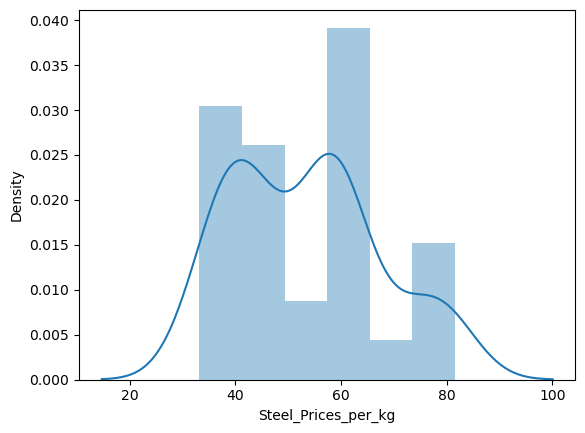

In [25]:
sns.distplot(df1['Steel_Prices_per_kg'])

Since, our target variable i.e. the steel prices, is following a Bi-Modal Distribution, the choice of regression model depends on the nature of my data. I may want to use models that can capture multiple modes or have the flexibility to handle different distribution shapes. Ensemble methods like Random Forest, Gradient Boosting, or more complex models like neural networks could be considered.

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


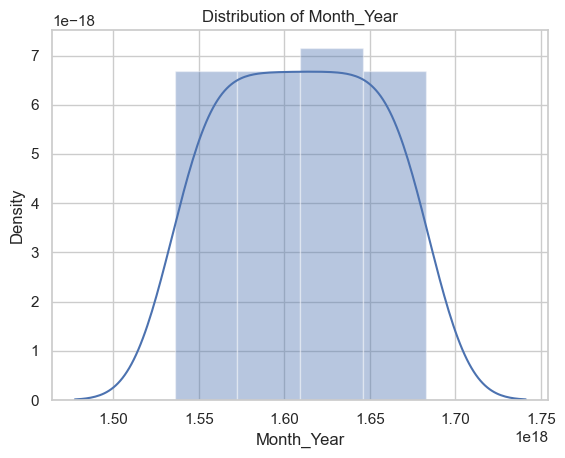

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


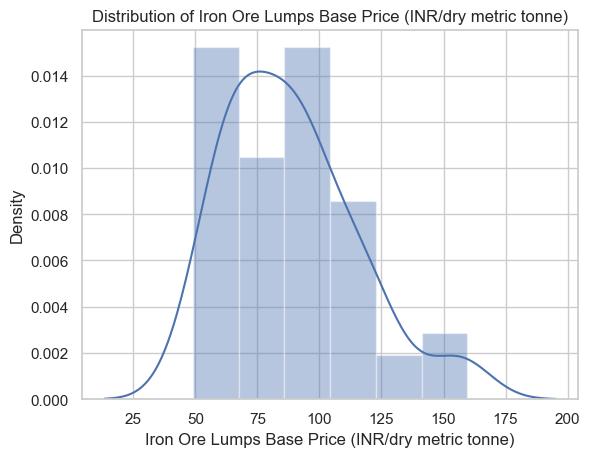

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


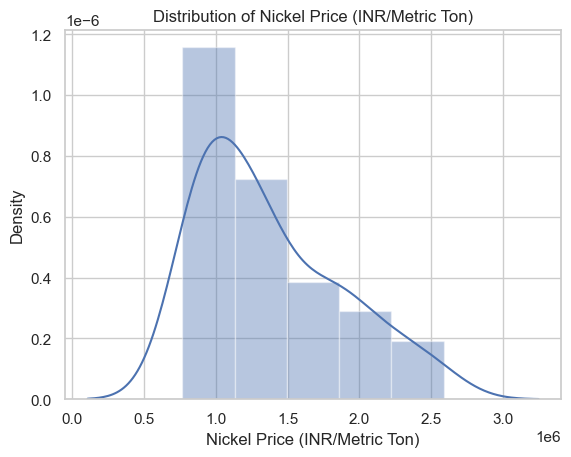

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


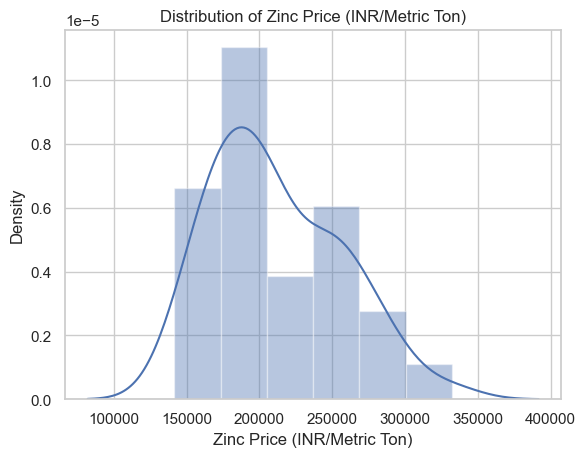

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


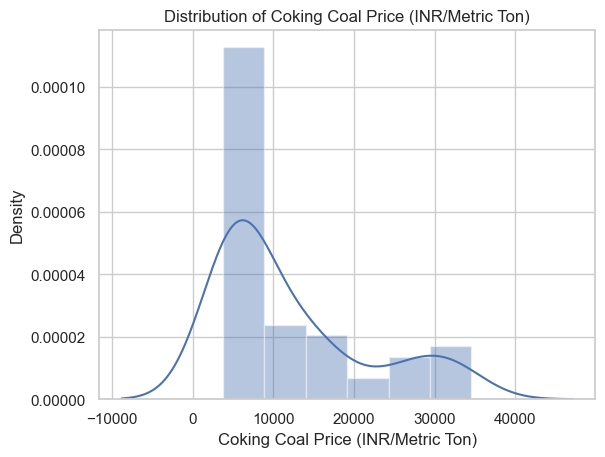

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


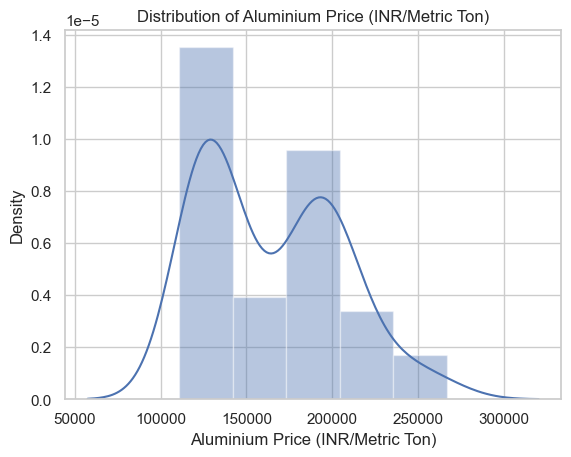

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


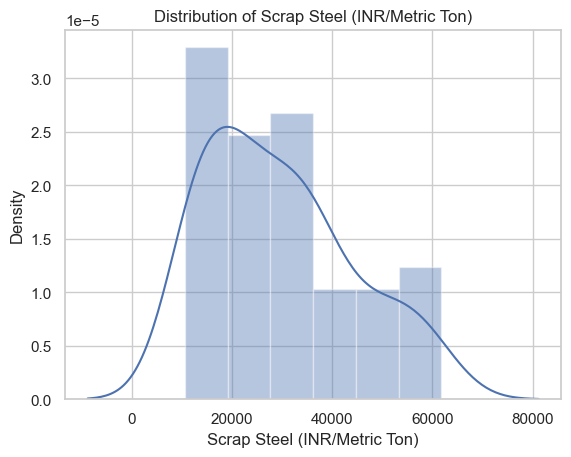

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


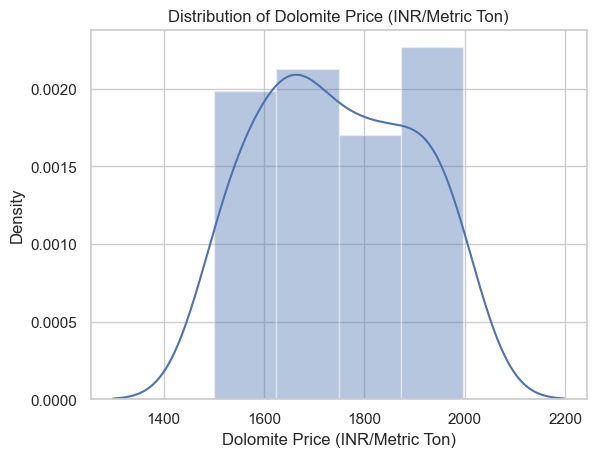

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


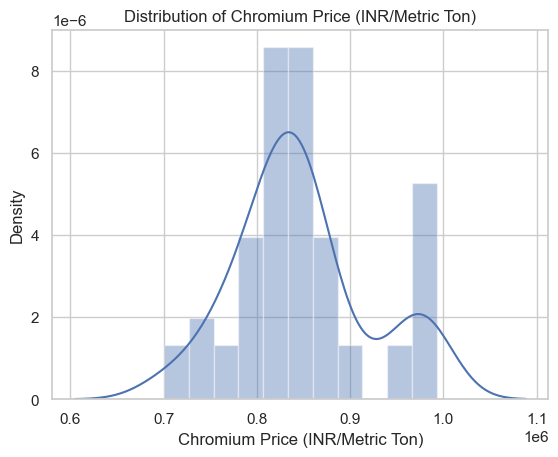

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


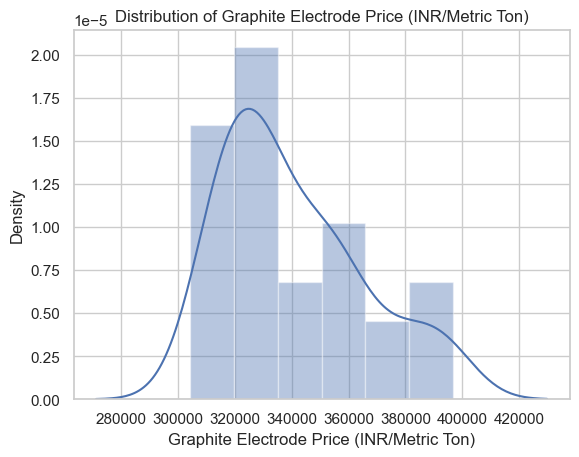

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


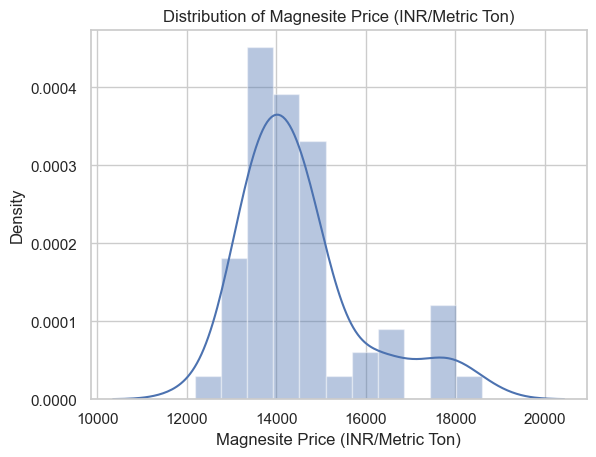

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


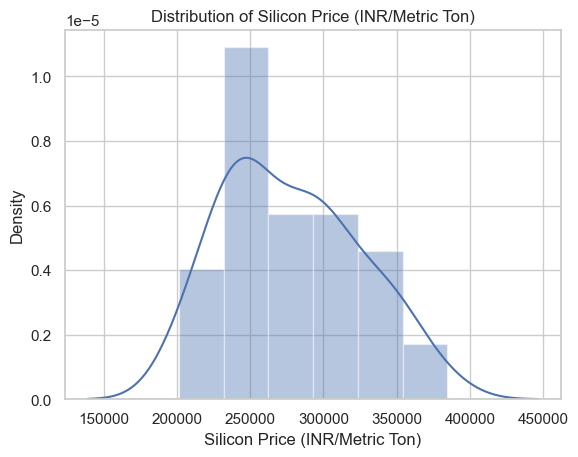

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


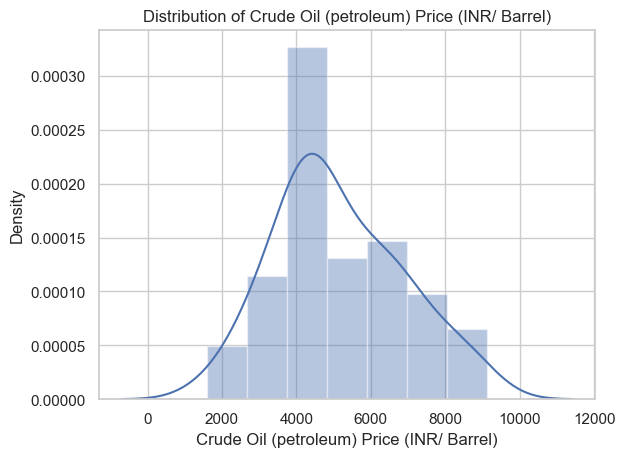

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


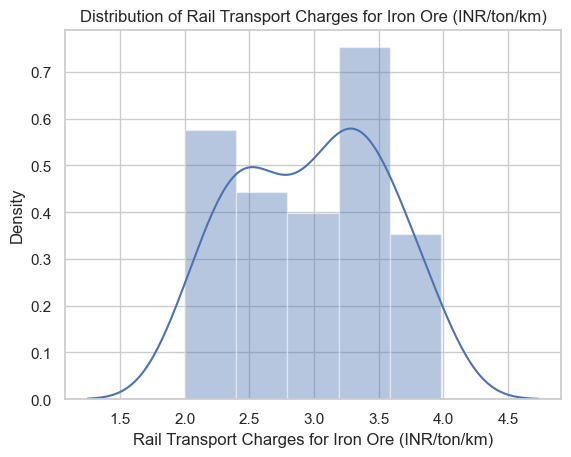

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


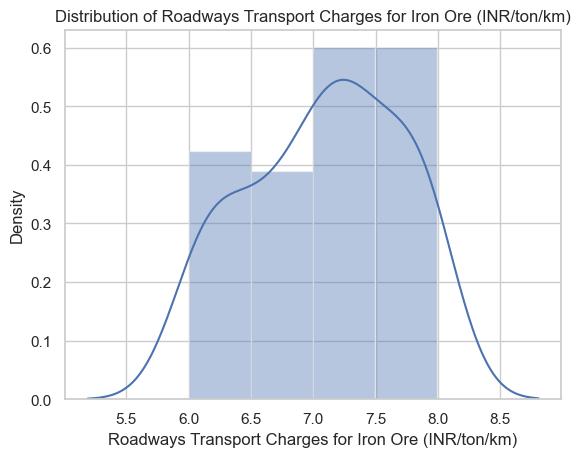

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


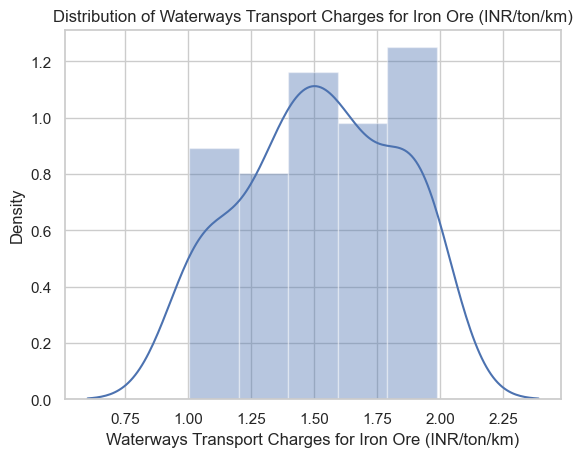

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


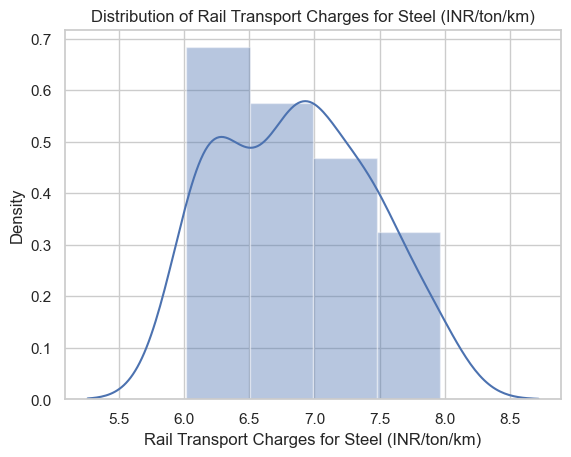

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


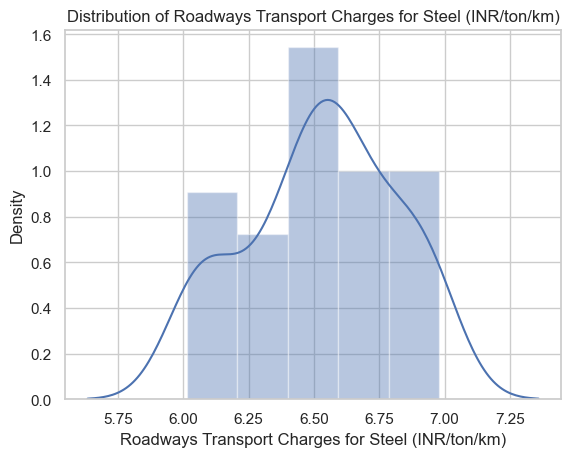

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


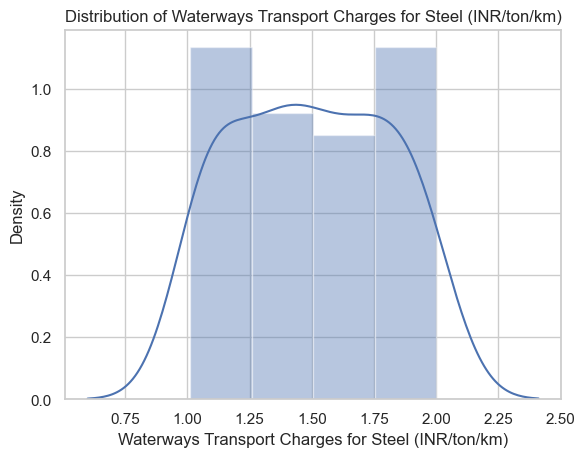

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


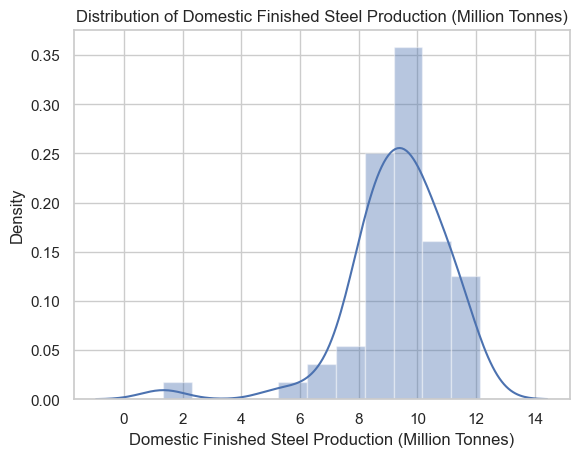

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


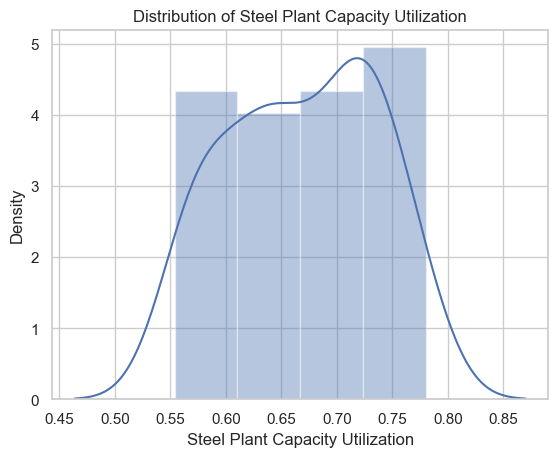

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


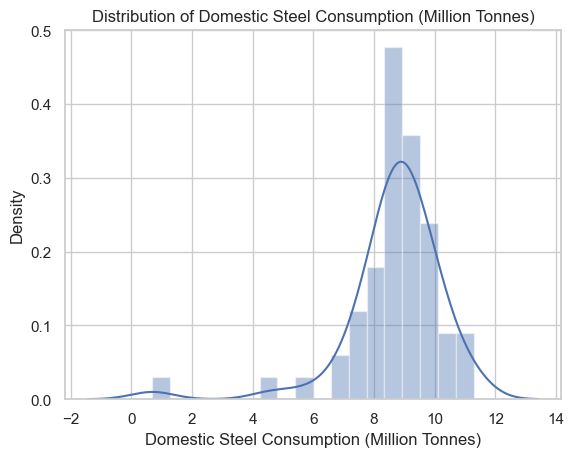

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


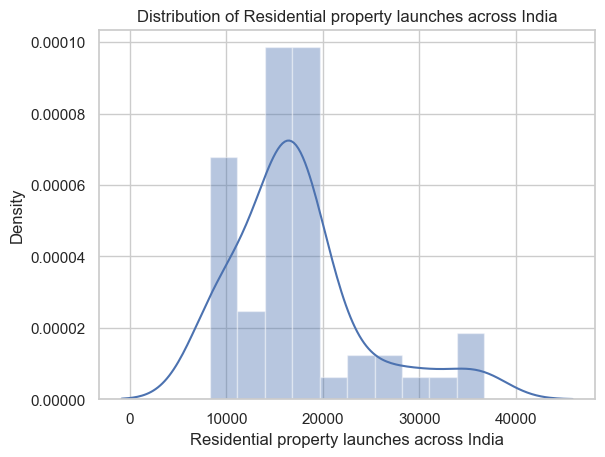

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


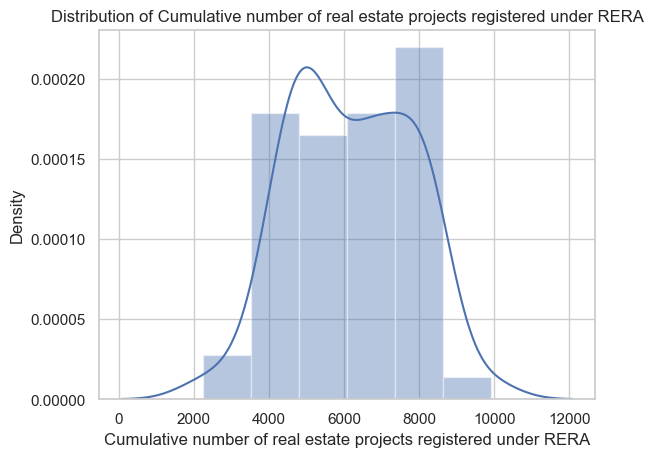

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


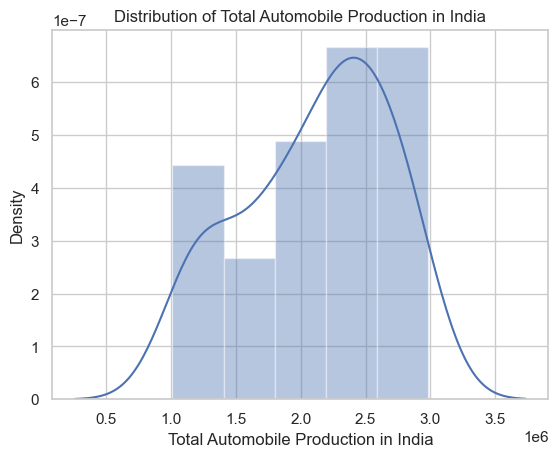

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


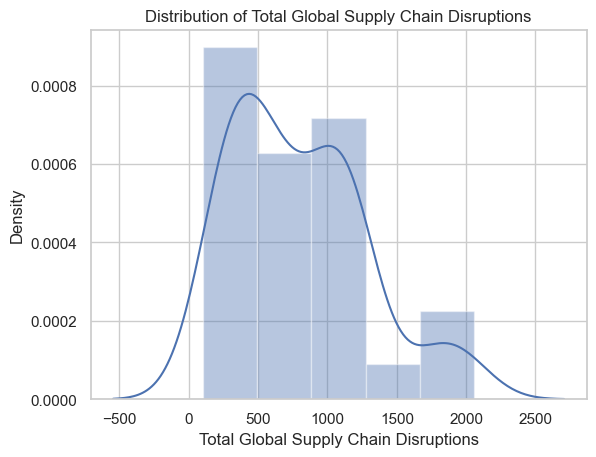

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


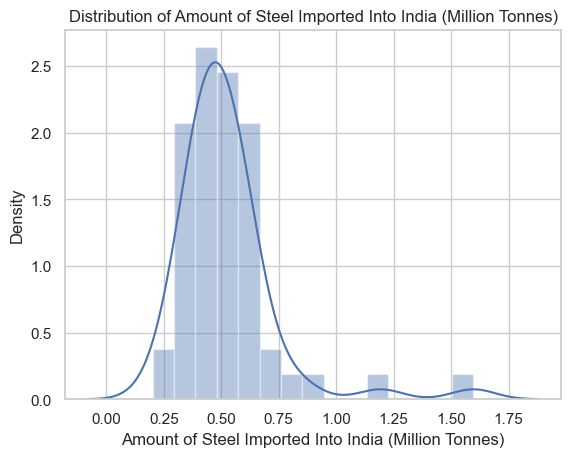

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


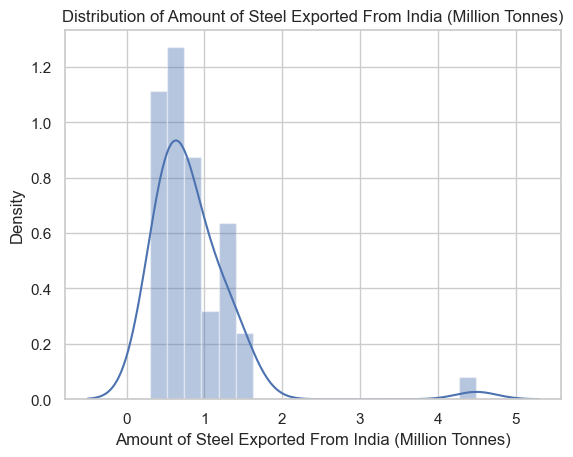

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


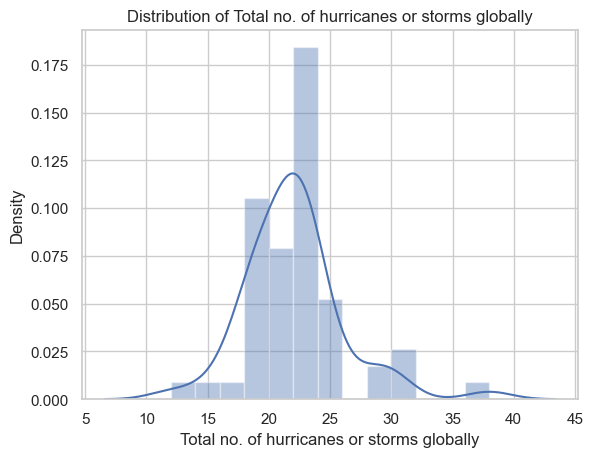

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


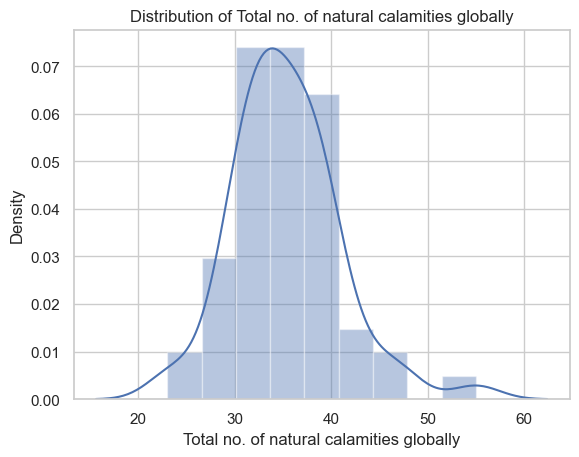

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


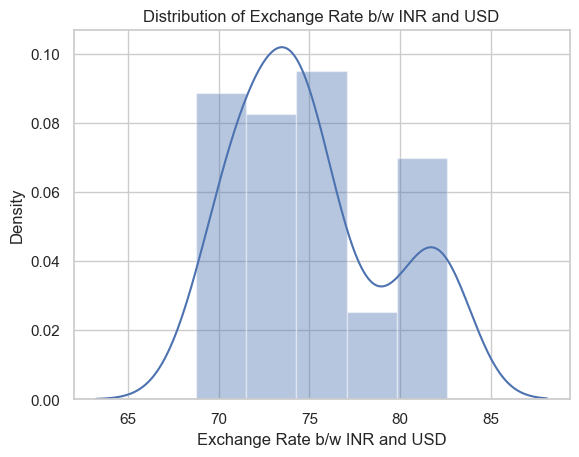

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


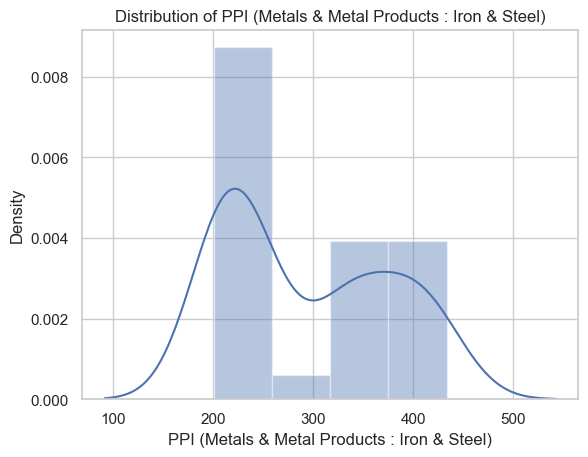

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


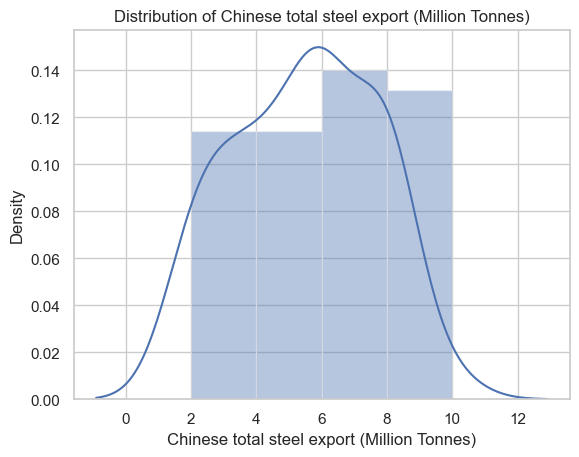

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


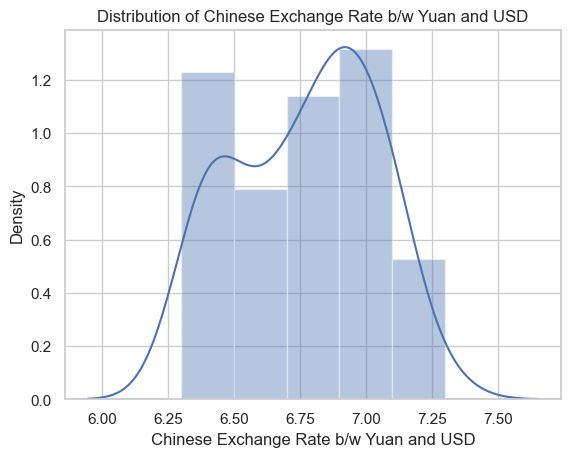

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


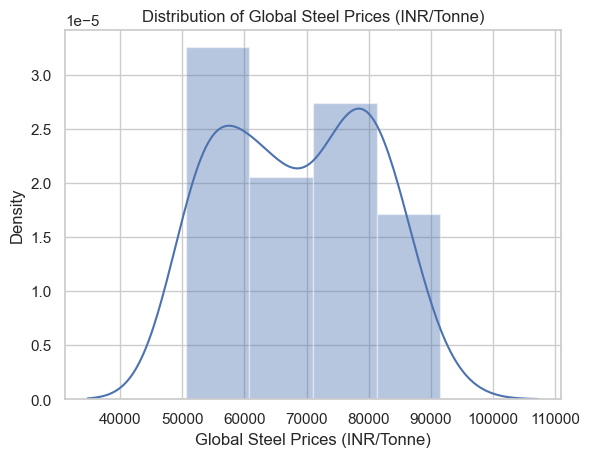

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


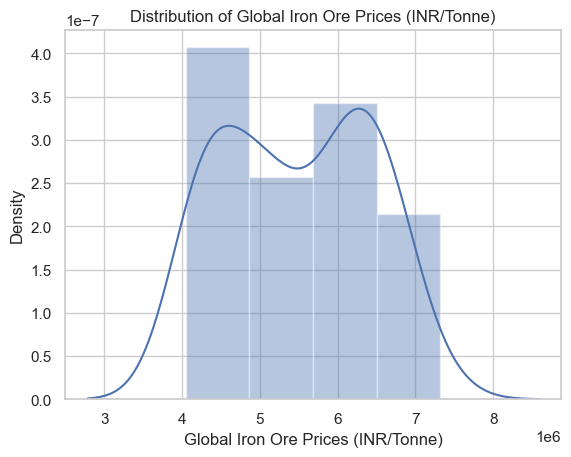

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


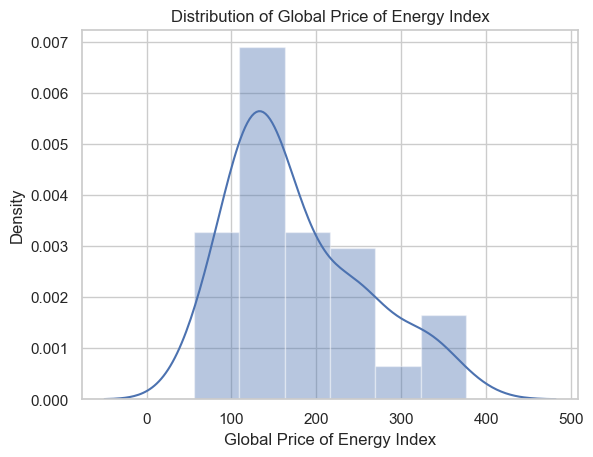

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


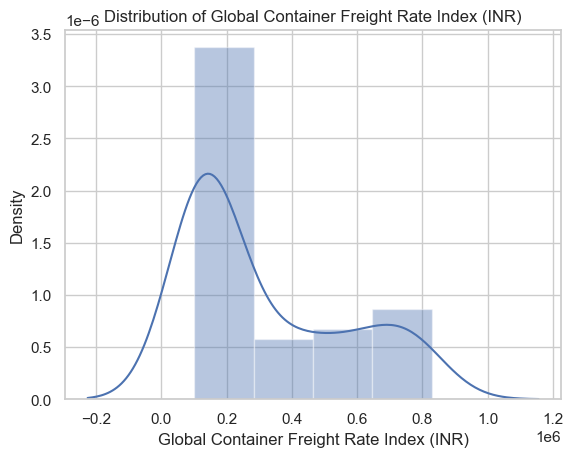

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


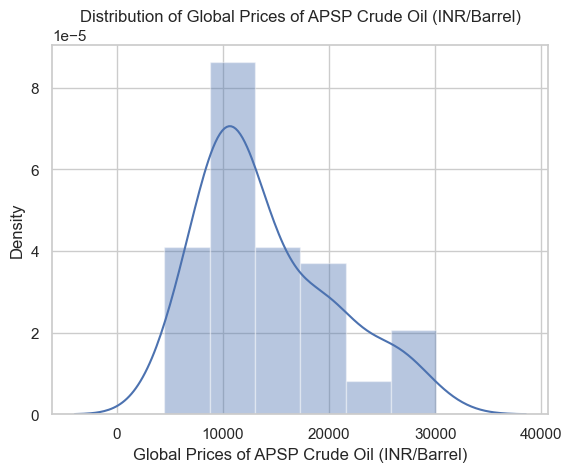

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


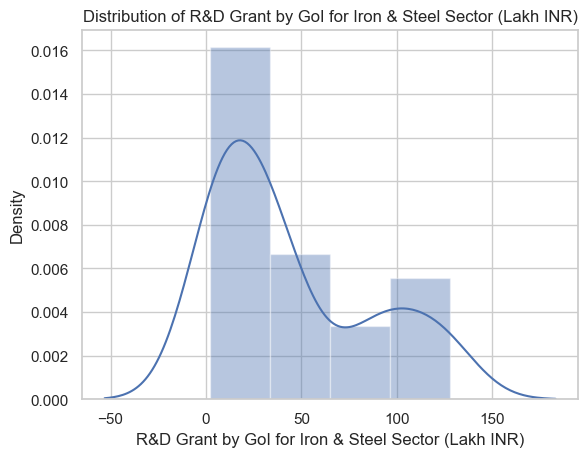

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


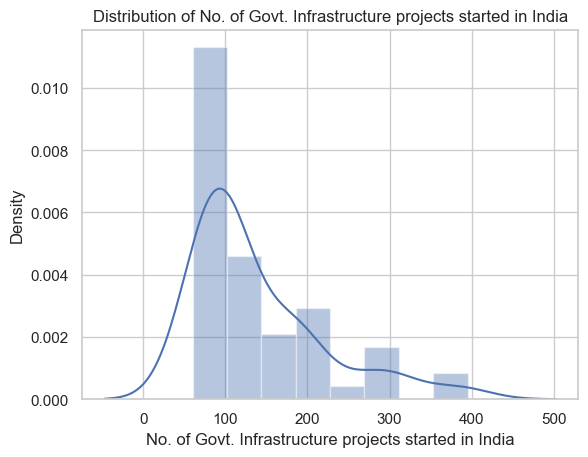

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


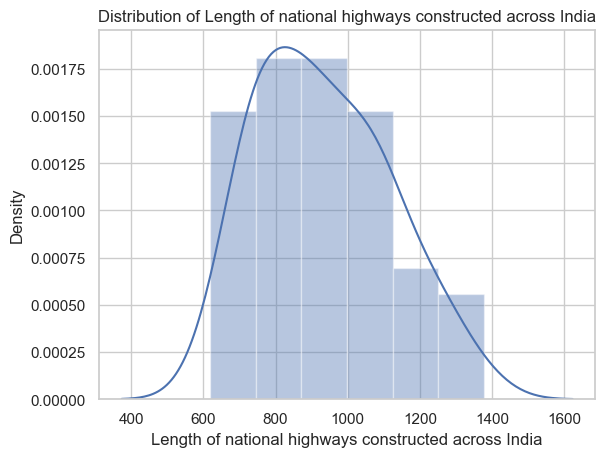

C:\Users\30118444\AppData\Local\Temp\ipykernel_3436\3633051854.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot


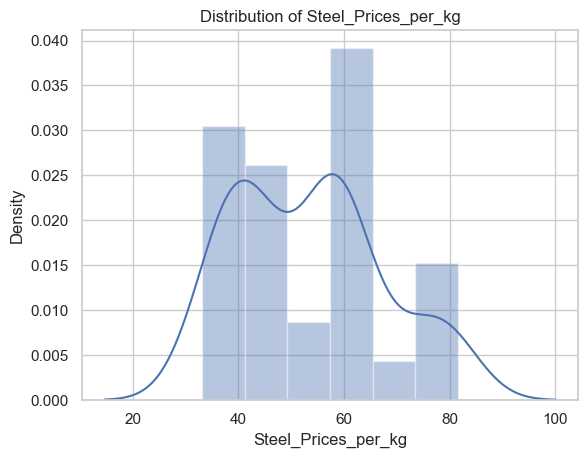

In [26]:
# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Loop through each column and create a distribution plot
for column in df1.columns:
    sns.distplot(df1[column])  # kde=False to remove the Kernel Density Estimate plot
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.show()

As we can see here, most of the data's independent variables follow a Gaussian Distribution. This is because most of the data is simulated where the values have been set such that they do not deviate more than +5% or -5% from their average values.

Also, some variables follow a bi-modal distribution, just like the target variable. Hence, I'll have to transform the variables or use non-linear complex regression algorithms.

<Axes: >

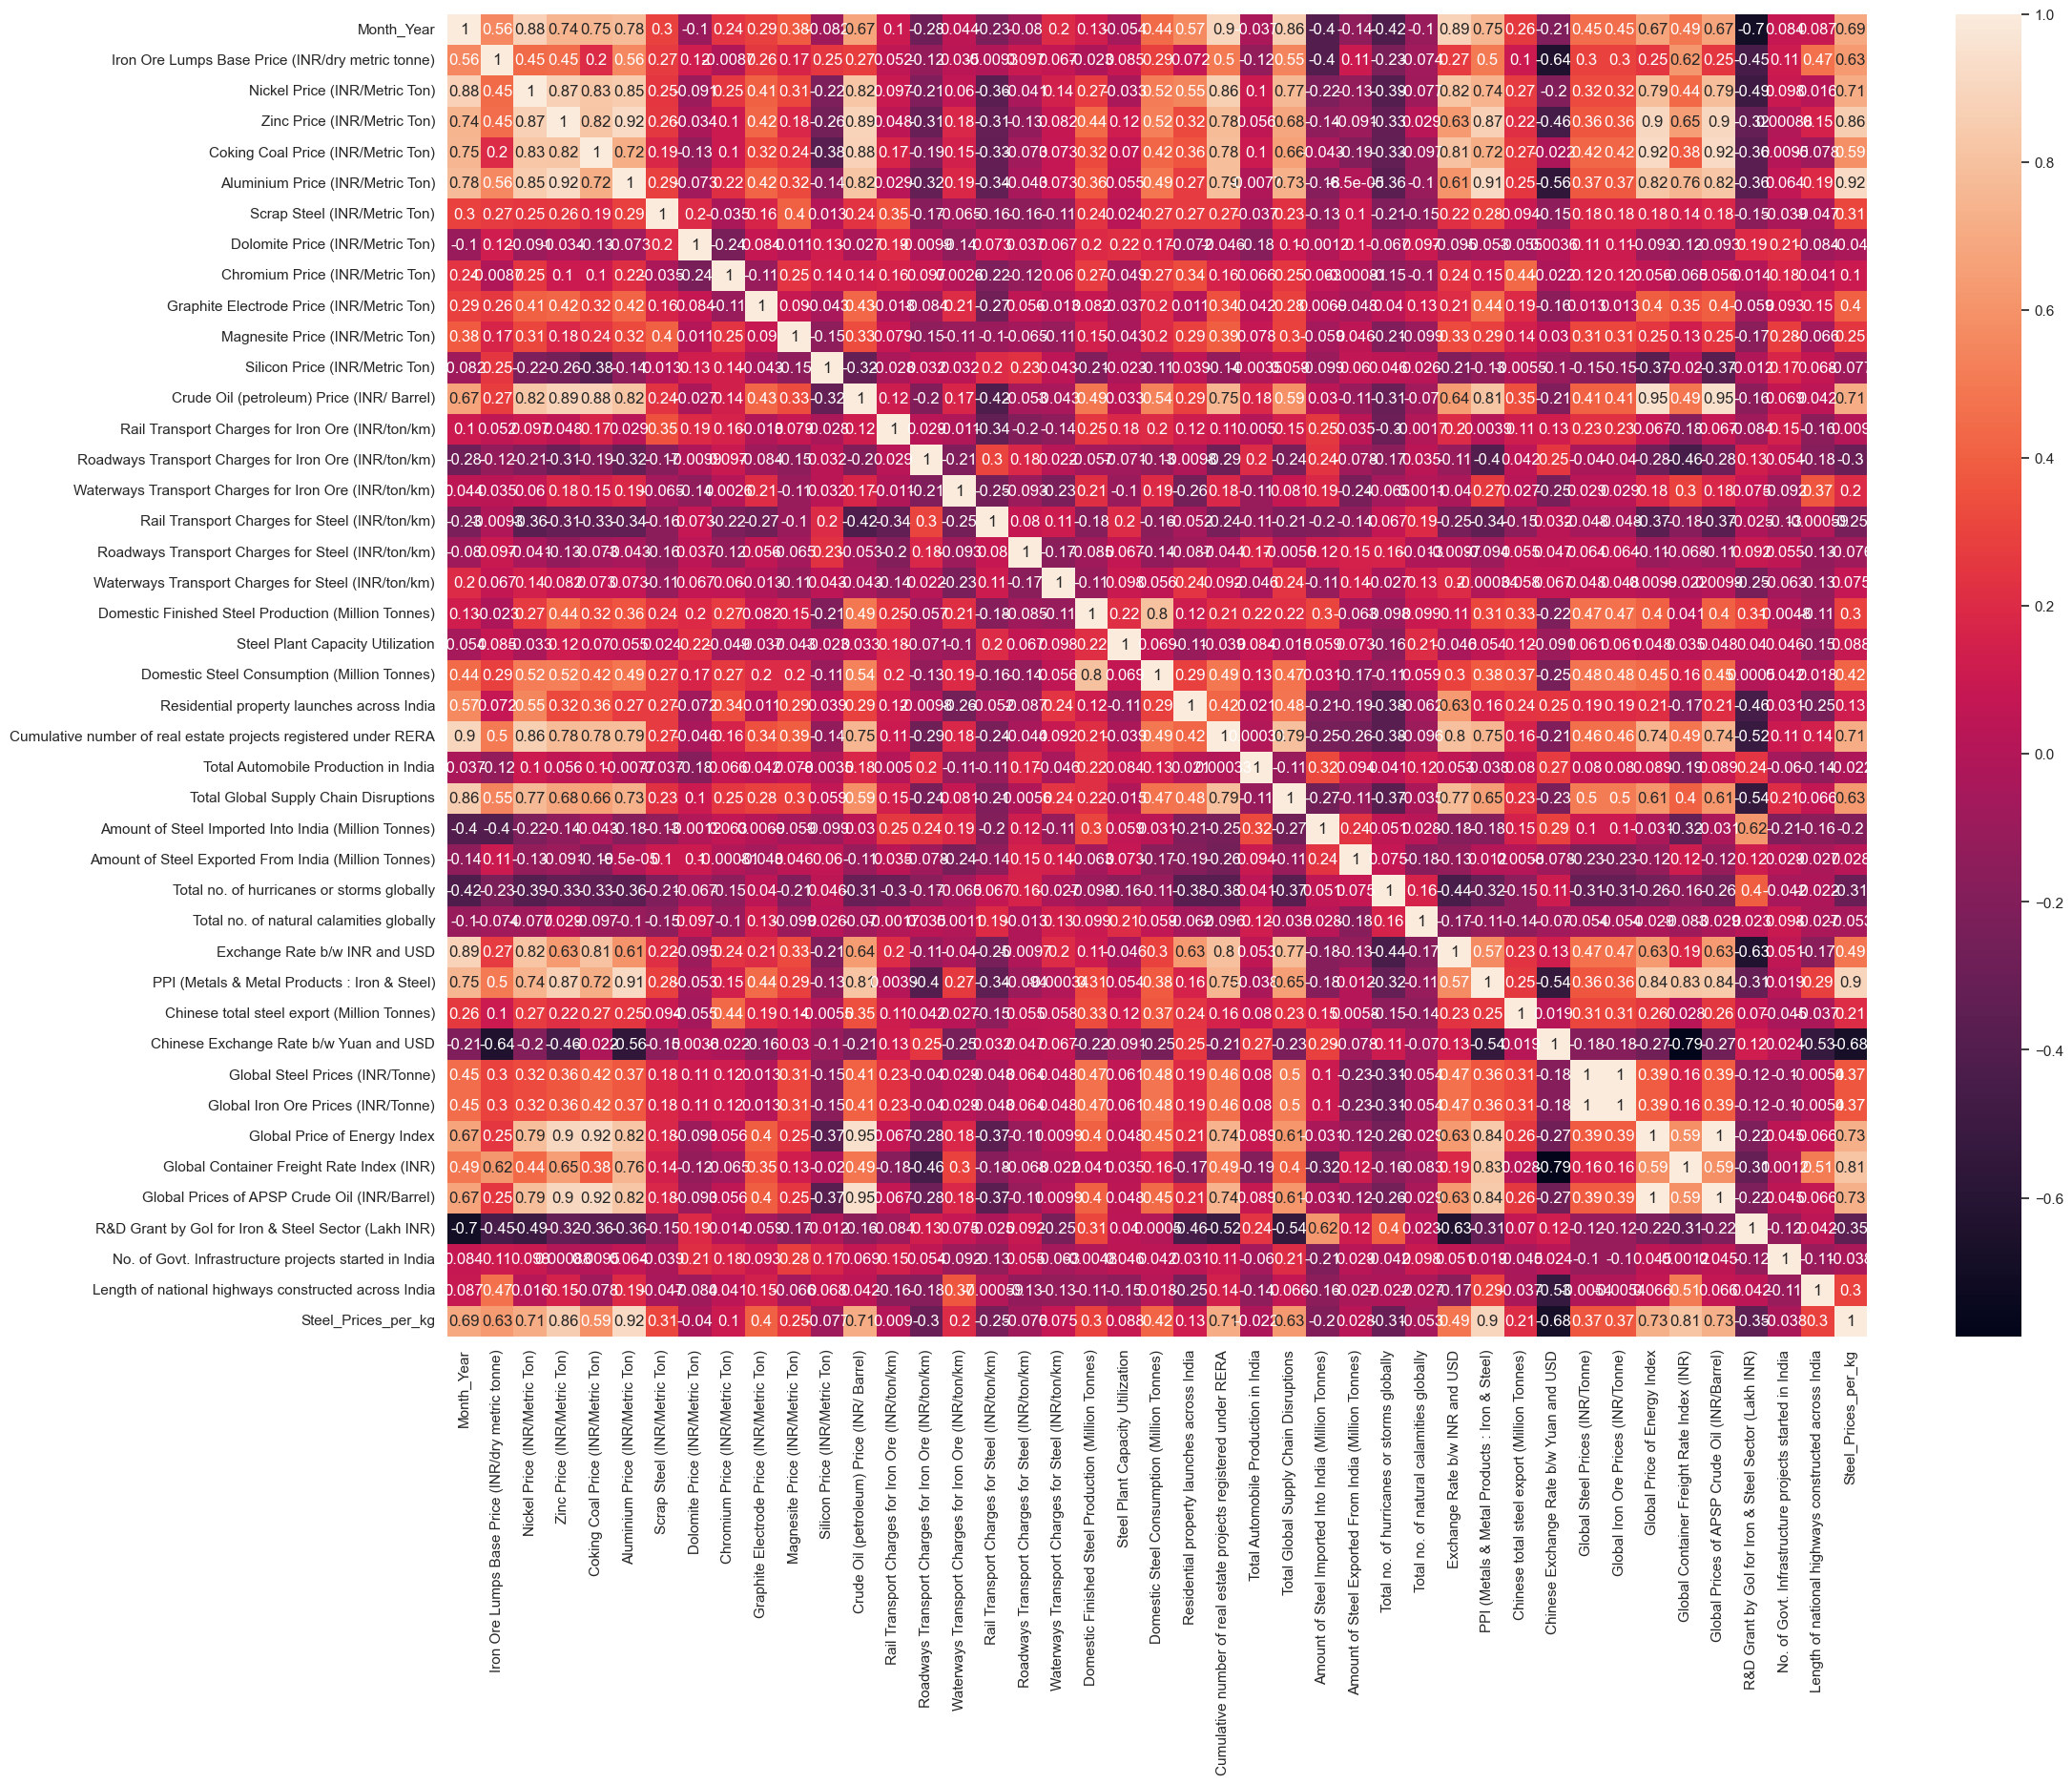

In [27]:
#correlation heatmap

plt.figure(figsize=(24,18)) 
sns.heatmap(df1.corr(), annot=True) 

### TIME SERIES DECOMPOSITION AND STATISTICAL TESTS


We can decompose a time series into trend, seasona,l nmd remainder components. The series can be decomposed as an additive or multiplicative combination of the base level, trend, seasonal inde,x and residual. The seasonal_decompose in stat smodels is used to implemens the decomposition.

We will then perfore statistical tests like KPSS and Augmented Dickey–Fuller tests to check stationarity.

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

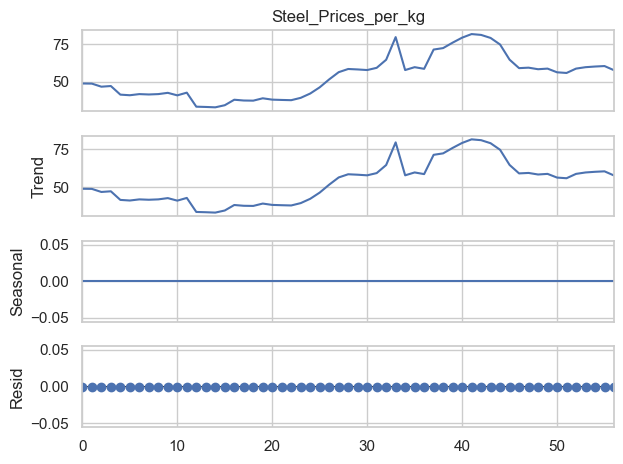

<Figure size 1500x1200 with 0 Axes>

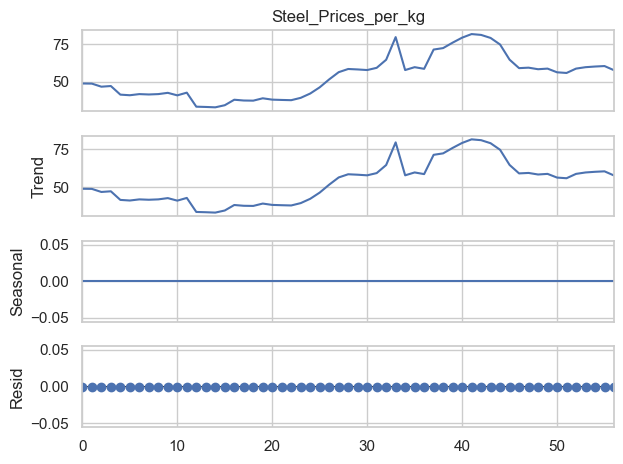

In [29]:
plt.figure(figsize=(15,12))
series = df1['Steel_Prices_per_kg']
result = seasonal_decompose(series, model='additive', period=1)
result.plot()

Post time series decomposition we don't observe any seasonality. Also, there is no constant mean, variance and covariance, hence the series is Non Stationary. We will perform statistical tests like KPSS and ADF to confirm our understanding.

But first, let's plot ACF and PACF graphs.

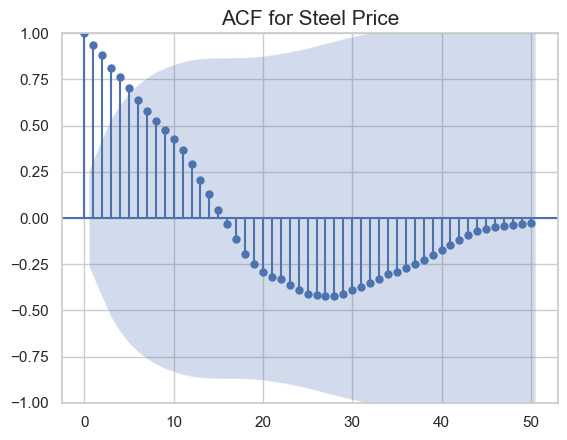

In [30]:
acf = plot_acf(series, lags=50, alpha=0.05)
plt.title("ACF for Steel Price", size=15)
plt.show()

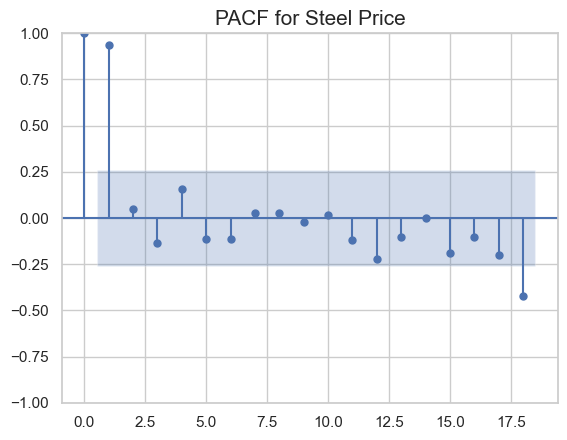

In [31]:
plot_pacf(series, alpha=0.05, method='ols')
plt.title("PACF for Steel Price", size=15)
plt.show()

#### KPSS Test

The KPSS test, short for Kwiatkowski-Phillips-Schmidt-Shin (KPSS), is a type of Unit root test that tests for the stationarity of a given series around a deterministic trend.

Here, the null hypothesis is that ---> the series is stationary.

That is, if the p-value is < significance level (say 0.05), then the series is non-stationary and vice versa.

In [32]:
stats, p, lags, critical_values = kpss(series, 'ct')

In [33]:
print(f'Test Statistics : {stats}')
print(f'p-value : {p}')
print(f'Critical Values : {critical_values}')

if p < 0.05:
    print('Series is not Stationary')
else:
    print('Series is Stationary')

Test Statistics : 0.14414730403300158
p-value : 0.05343091845740447
Critical Values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is Stationary


#### Interpreting KPSS test results

The output of the KPSS test contains 4 things:

1. The KPSS statistic
2. p-value
3. Number of lags used by the test
4. Critical values

The p-value the test reports is the probability score based on which you can decide whether to reject the null hypothesis. 
We reject the null hypothesis if the p-value is less than a predefined alpha level (typically 0.05).

The KPSS statistic is the actual test statistic that is computed while performing the test. The number of lags reported is the number of lags of the series that was actually used by the model equation of the KPSS test.

The test statistic should be greater than the provided critical values to reject the null hypothesis. If it is in fact higher than the target critical value, then that should automatically reflect in a low p-value. That is, if the p-value is less than 0.05, the kpss statistic will be greater than the 5% critical value.

#### ADF Test

The only difference here is the Null hypothesis which is just the opposite of KPSS. The null hypothesis of the test is the presence of a unit root; that is, the series is non-stationary.

In [34]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    
    print (dfoutput)
    
    if p > 0.05:
        print('Series is not Stationary')
    else:
        print('Series is Stationary')

adf_test(series)

Results of Dickey-Fuller Test:
Test Statistic                 -1.319358
p-value                         0.620270
#Lags Used                      0.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64
Series is not Stationary


#### Conclusion

KPSS says series is stationary and ADF says series is not stationary. It means series is difference stationary, we will use differencing to make series stationary.

### DATA CLEANING and DATA SPLITTING

In [93]:
X = df1.drop(columns=['Steel_Prices_per_kg'])
y = df1['Steel_Prices_per_kg']

In [94]:
# Calculate the split point based on the percentage
split_percentage = 0.8  # 80% for training, 20% for testing
split_index = int(len(df1) * split_percentage)

# Create the training and testing sets
train_data = df1[:split_index]
test_data = df1[split_index:]

# Reset index for the training and testing DataFrames (optional)
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [95]:
# Define your feature columns (X) and target column (y)
X_train = train_data.drop(columns=['Steel_Prices_per_kg', 'Month_Year'])
y_train = train_data['Steel_Prices_per_kg']
X_test = test_data.drop(columns=['Steel_Prices_per_kg', 'Month_Year'])
y_test = test_data['Steel_Prices_per_kg']

In [96]:
## drop features with low variabiliry
variance_treshold = 0.9
low_var_cols = [col for col in X_train.columns if X_train[col].value_counts(dropna=False, normalize=True).values[0] > variance_treshold]
X_train = X_train.drop(low_var_cols, axis=1)
X_test = X_test.drop(low_var_cols, axis=1)

In [97]:
X_train.shape

(45, 41)

In [98]:
# Threshold for removing correlated variables, thanks to @ Vitalii Mokin
threshold = 0.8  ## optimal level 0.8

# Absolute value correlation matrix
corr_matrix = X_train.corr().abs().round(2)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Select columns with Pearson's correlations above threshold
collinear_features = [column for column in upper.columns if any(upper[column] > threshold)]
features_filtered = X_train.drop(columns = collinear_features)
print('The number of features that passed the collinearity threshold: ', features_filtered.shape[1])
features_best = []
features_best.append(features_filtered.columns.tolist())

The number of features that passed the collinearity threshold:  30


In [99]:
X_train = X_train[features_best[0]]
X_test = X_test[features_best[0]]

#### Scaling the Data

In [100]:
# importing sklearn StandardScaler class which is for Standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # creating an instance of the class object
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)  #fit and transforming StandardScaler the dataframe 

X_test = pd.DataFrame(sc.fit_transform(X_test), columns=X_train.columns)

### MODEL BUILDING

#### ARIMA Model

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data.This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

1. AR: Autoregression A model that uses the dependent relationship between an observation and some number of lagged observations.
1. I: Integrated The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
2. MA: Moving Average A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

1. p: The number of lag observations included in the model, also called the lag order.
2. d: The number of times that the raw observations are differenced, also called the degree of dfferencing.
3. q: The size of the moving average window, also called the order of moving average.

In [101]:
import pmdarima as pm

model = pm.auto_arima(y_train, exogenous=X_train, 
                      trace=True, error_action="ignore", suppress_warnings=True)
model.fit(y_train, exogenous=X_train)

forecast = model.predict(n_periods=len(X_test), exogenous=X_test)
y_pred = forecast

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=277.677, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=272.960, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=273.405, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=273.422, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=271.526, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=274.421, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.281 seconds


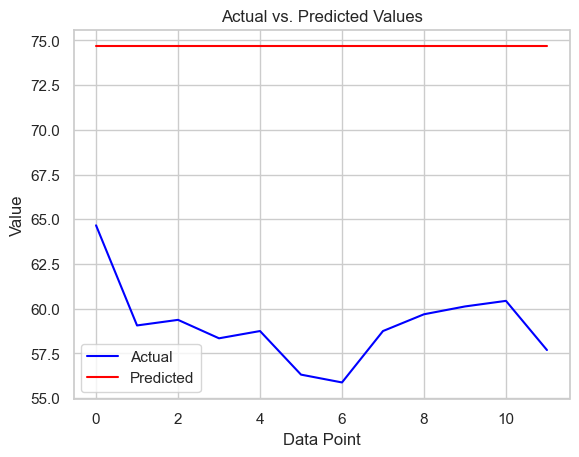

In [102]:
# Create an array of indices (x values) corresponding to the data points
x_values = range(len(y_test))

# Plot the actual values (y_test) as a blue line
plt.plot(x_values, y_test, label='Actual', color='blue')

# Plot the predicted values (y_pred) as a red line
plt.plot(x_values, y_pred, label='Predicted', color='red')

# Add labels and a legend
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(y_test, y_pred)))

print("\nMAE of Auto ARIMAX:", mean_absolute_error(y_test, y_pred))

print("\nR2 Score of Auto ARIMAX:", r2_score(y_test, y_pred))

RMSE of Auto ARIMAX: 15.722946338638586

MAE of Auto ARIMAX: 15.576062500000011

R2 Score of Auto ARIMAX: -52.772876109603224


#### Recursive Feature Elimination (RFE)

Since, our data has (no. of samples ~ no. of features), we need to use RFE. Recursive Feature Elimination (RFE) is a feature selection technique used in machine learning to select the most important features or variables for a predictive model. 

Once this is done, we will try out various models to fit our data and predict steel prices.

##### Checking Baseline Score of a Random Forest Model

In [104]:
from sklearn.model_selection import TimeSeriesSplit

SEED = 52

# prepare the model with target scaling
rf = RandomForestRegressor(max_depth=4, n_estimators=5, random_state=SEED)

# evaluate model
#cv = KFold(n_splits=10, shuffle=False)
cv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# summarize the result
s_mean = np.abs(mean(scores))
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 8.772


##### Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

models = {
    'Random Forest': RandomForestRegressor(random_state=SEED),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
    # Add more models as needed
}

features_rfecv_list = {}

min_mae = float('inf')
best_model_name = None
best_features = None
results_df = pd.DataFrame(columns=['Model', 'Features', 'MAE'])

# The below for loop does RFE & determines weightage for each model 
# Correlation coefficient will be common hence done before
# From the filtered features of correlation, RFE has to be done for each model 

for model_name, model in models.items():
    selector = RFECV(model, step=1, cv=cv, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')
    selector.fit(X_train, y_train)
    
    print(model_name)
    print('The optimal number of features is {}'.format(selector.n_features_))
    features_rfecv_list[model_name] = [f for f, s in zip(X_train.columns, selector.support_) if s]
    print('The selected features are:')
    print('{}'.format(features_rfecv_list[model_name]))  # optimal features list

    # Use cross-validation to get mean absolute error
    X_rfe = X_train[features_rfecv_list[model_name]]
    mae_scores = -cross_val_score(model, X_rfe, y_train, cv=cv, scoring='neg_mean_absolute_error')
    mean_mae = mae_scores.mean()
    print('Mean MAE:', mean_mae)

    # Append results to DataFrame
    results_df.loc[len(results_df)] = [model_name, len(features_rfecv_list[model_name]), mean_mae]

    # Update best model if the current model has lower MAE
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_model_name = model_name
        best_features = features_rfecv_list[model_name]

# Output the best model and its features
print('Best Model:', best_model_name)
print('Best Features:', best_features)
results_df = results_df.sort_values(by='MAE', ascending=False).reset_index(drop=True)
results_df

Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Random Forest
The optimal number of features is 4
The selected featur

Model  Features        MAE
0      Random Forest         4  10.116148
1            XGBoost        11   9.314491
2  Gradient Boosting         7   8.216970

In [106]:
features_rfecv = best_features
X_rfe = X_train[features_rfecv]
X_test1 = X_test[features_rfecv]

In [107]:
X_rfe.head()

Iron Ore Lumps Base Price (INR/dry metric tonne)  \
0                                         -1.304005   
1                                         -1.147598   
2                                         -1.196304   
3                                         -1.320812   
4                                         -1.153086   

   Nickel Price (INR/Metric Ton)  \
0                      -0.752900   
1                      -0.747775   
2                      -0.990864   
3                      -1.088330   
4                      -0.971325   

   Roadways Transport Charges for Steel (INR/ton/km)  \
0                                           0.881288   
1                                           0.489294   
2                                           0.817944   
3                                          -0.187423   
4                                           0.673371   

   Domestic Finished Steel Production (Million Tonnes)  \
0                                           0.928867     
1                                           1.099016     
2                                           1.010584     
3                                           1.443792     
4                                           1.400695     

   Total Global Supply Chain Disruptions  Global Steel Prices (INR/Tonne)  \
0                              -0.940809                         1.877967   
1                              -1.459067                         1.795612   
2                              -0.788380                        -0.694772   
3                              -1.434124                         1.252102   
4                              -1.090466                         0.223082   

   R&D Grant by GoI for Iron & Steel Sector (Lakh INR)  
0                                           1.529775    
1                                           1.785686    
2                                           1.762421    
3                                           1.646098    
4                                           0.924896

##### Feature Importance

import eli5 
import shap 
from eli5.sklearn import PermutationImportance
rf.fit(X_rfe, y_train)
perm = PermutationImportance(rf, random_state=SEED).fit(X_rfe, y_train)
eli5.show_weights(perm, feature_names = X_rfe.columns.tolist())

import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_rfe)
shap.summary_plot(shap_values, X_rfe, plot_type="bar")

shap.summary_plot(shap_values, X_rfe)

### Fitting Various Models

In [110]:
# Define a list of regression models
models = {
    'Random Forest': RandomForestRegressor(max_depth=3, n_estimators=10, random_state=SEED),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()    # Add more models as needed
}

# Loop through each model and evaluate it
for model_name, model in models.items():
    model.fit(X_rfe, y_train)
    scores = cross_val_score(model, X_rfe, y_train, cv=cv, scoring='neg_mean_absolute_error')
    print(f"{model_name} CV Accuracy Score after feature selection: {np.abs(scores.mean().round(3))}")

Random Forest CV Accuracy Score after feature selection: 9.167
K-Nearest Neighbors CV Accuracy Score after feature selection: 10.11
Gradient Boosting CV Accuracy Score after feature selection: 8.047
XGBoost CV Accuracy Score after feature selection: 9.972


We can see that the mean MAE over all cross validation sets has improved by almost a value of 1000 after Recursive Feature Elimination.

In [111]:
# Initialize an empty list to store results
results = []

# Loop through the models and calculate accuracy measures
for model_name, model in models.items():
    model.fit(X_rfe, y_train)  # Fit the model
    y_pred = model.predict(X_test1)  # Make predictions

    # Calculate accuracy measures and store them in a dictionary
    model_results = {
        'Model': model_name,
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
    }

    # Append the model results to the list
    results.append(model_results)

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results)

In [112]:
# Display the results
results_df

Model       RMSE        MAE
0        Random Forest  14.102057  12.412960
1  K-Nearest Neighbors  13.196226  11.035097
2    Gradient Boosting  15.535890  13.292987
3              XGBoost  15.402854  13.124693

### Let's try Deep Learning based Models (CNN, RNN, MLP)

Neural network algorithms, such as deep learning models, have the capability to automatically learn and extract relevant features from the input data. This ability is one of the reasons why deep learning has gained popularity, as it can potentially reduce the need for extensive manual feature engineering, especially in tasks involving unstructured data like images, text, and audio.

On testing, I found no difference in using all features, versus selected features.

In [115]:
a = len(features_rfecv)

In [116]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define and train a CNN Regressor with input shape (None, 9, 1) for 9 features
cnn_regressor = keras.Sequential([
    layers.Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(a, 1)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer with 1 neuron for regression
])

cnn_regressor.compile(optimizer='adam', loss='mean_squared_error')
cnn_regressor.fit(np.expand_dims(X_rfe, axis=-1), y_train, epochs=50, batch_size=32, verbose=0)

# Make predictions with the CNN Regressor
cnn_y_pred = cnn_regressor.predict(np.expand_dims(X_test1, axis=-1))

# Define and train an RNN Regressor with input shape (None, 9, 1) for 9 features
rnn_regressor = keras.Sequential([
    layers.SimpleRNN(32, activation='relu', input_shape=(a, 1)),
    layers.Dense(1)  # Output layer with 1 neuron for regression
])

rnn_regressor.compile(optimizer='adam', loss='mean_squared_error')
rnn_regressor.fit(np.expand_dims(X_rfe, axis=-1), y_train, epochs=50, batch_size=32, verbose=0)

# Make predictions with the RNN Regressor
rnn_y_pred = rnn_regressor.predict(np.expand_dims(X_test1, axis=-1))

# Define and train an MLP Regressor with input shape (30,)
mlp_regressor = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(a,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer with 1 neuron for regression
])

mlp_regressor.compile(optimizer='adam', loss='mean_squared_error')
mlp_regressor.fit(X_rfe, y_train, epochs=50, batch_size=32, verbose=0)

# Make predictions with the MLP Regressor
mlp_y_pred = mlp_regressor.predict(X_test1)

# Evaluate the models
cnn_rmse = np.sqrt(mean_squared_error(y_test, cnn_y_pred))
rnn_rmse = np.sqrt(mean_squared_error(y_test, rnn_y_pred))
mlp_rmse = np.sqrt(mean_squared_error(y_test, mlp_y_pred))

print(f"CNN RMSE: {cnn_rmse}")
print(f"RNN RMSE: {rnn_rmse}")
print(f"MLP RMSE: {mlp_rmse}")

1/1 [==============================] - 0s 67ms/step
CNN RMSE: 33.371613997669826
RNN RMSE: 11.487055198275732
MLP RMSE: 45.90113584121098


In [117]:
# Define and train a CNN Regressor with input shape (None, 30, 1) for 30 features
cnn_regressor = keras.Sequential([
    layers.Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(30, 1)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer with 1 neuron for regression
])

cnn_regressor.compile(optimizer='adam', loss='mean_squared_error')
cnn_regressor.fit(np.expand_dims(X_train, axis=-1), y_train, epochs=50, batch_size=32, verbose=0)

# Make predictions with the CNN Regressor
cnn_y_pred = cnn_regressor.predict(np.expand_dims(X_test, axis=-1))

# Define and train an RNN Regressor with input shape (None, 30, 1) for 30 features
rnn_regressor = keras.Sequential([
    layers.SimpleRNN(32, activation='relu', input_shape=(30, 1)),
    layers.Dense(1)  # Output layer with 1 neuron for regression
])

rnn_regressor.compile(optimizer='adam', loss='mean_squared_error')
rnn_regressor.fit(np.expand_dims(X_train, axis=-1), y_train, epochs=50, batch_size=32, verbose=0)

# Make predictions with the RNN Regressor
rnn_y_pred = rnn_regressor.predict(np.expand_dims(X_test, axis=-1))

# Define and train an MLP Regressor with input shape (30,)
mlp_regressor = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(30,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer with 1 neuron for regression
])

mlp_regressor.compile(optimizer='adam', loss='mean_squared_error')
mlp_regressor.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Make predictions with the MLP Regressor
mlp_y_pred = mlp_regressor.predict(X_test)

# Evaluate the models
cnn_rmse = np.sqrt(mean_squared_error(y_test, cnn_y_pred))
rnn_rmse = np.sqrt(mean_squared_error(y_test, rnn_y_pred))
mlp_rmse = np.sqrt(mean_squared_error(y_test, mlp_y_pred))

print(f"CNN RMSE: {cnn_rmse}")
print(f"RNN RMSE: {rnn_rmse}")
print(f"MLP RMSE: {mlp_rmse}")

1/1 [==============================] - 0s 64ms/step
CNN RMSE: 13.825379704923305
RNN RMSE: 8.919973517957605
MLP RMSE: 37.38850014873775


In [226]:
rnn_rmse = np.sqrt(mean_squared_error(y_test, rnn_y_pred))
rnn_mae = mean_absolute_error(y_test, rnn_y_pred)
rnn_r2 = r2_score(y_test, rnn_y_pred)

print(f"RNN RMSE: {rnn_rmse}")
print(f"RNN MAE: {rnn_mae}")

RNN RMSE: 9636.60625442267
RNN MAE: 7196.104817708333


#### Therefore, RNN is giving the best results for MAE, that is, around INR 7k. This means that my model's predictions are on average INR 7200 away from the actual Steel prices.

In [118]:
import plotly.express as px

# Create a DataFrame to hold the data
rnn_y_pred = rnn_y_pred.flatten()

comparison_data = pd.DataFrame({'Actual': y_test, 'Predicted': rnn_y_pred})

# Create a line chart using Plotly Express
fig = px.line(comparison_data, x=comparison_data.index, y=['Actual', 'Predicted'], title='Actual vs. Predicted Values')
fig.update_traces(mode='lines+markers')

# Customize the layout (optional)
fig.update_layout(
    xaxis_title='Data Point Index',
    yaxis_title='Value',
    legend_title='Legend',
    showlegend=True
)

# Show the chart
fig.show()

In [130]:
# convert jupyter notebook to .py file
!jupyter nbconvert --to script Steel_Prices_Prediction_Model_original.ipynb

[NbConvertApp] Converting notebook Steel_Prices_Prediction_Model_original.ipynb to script
[NbConvertApp] Writing 25275 bytes to Steel_Prices_Prediction_Model_original.py
